<a href="https://colab.research.google.com/github/commitit/Stock-Prediction/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import tensorflow as tf

import datetime

In [216]:
df = pd.read_csv("https://raw.githubusercontent.com/commitit/Stock-Prediction/main/AXP.csv")

In [217]:
df.head(50)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-06-01,3.693287,3.693287,3.693287,3.693287,0.406085,0.0
1,1972-06-02,3.677195,3.677195,3.677195,3.677195,0.404316,0.0
2,1972-06-05,3.604777,3.604777,3.604777,3.604777,0.396353,0.0
3,1972-06-06,3.411664,3.411664,3.411664,3.411664,0.375120,0.0
4,1972-06-07,3.371432,3.371432,3.371432,3.371432,0.370696,0.0
5,1972-06-08,3.451896,3.451896,3.451896,3.451896,0.379544,0.0
6,1972-06-09,3.427757,3.427757,3.427757,3.427757,0.376890,0.0
7,1972-06-12,3.484082,3.484082,3.484082,3.484082,0.383082,0.0
8,1972-06-13,3.484082,3.484082,3.484082,3.484082,0.383082,0.0
9,1972-06-14,3.443850,3.443850,3.443850,3.443850,0.378659,0.0


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12064 entries, 0 to 12063
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       12064 non-null  object 
 1   Open       12064 non-null  float64
 2   High       12064 non-null  float64
 3   Low        12064 non-null  float64
 4   Close      12064 non-null  float64
 5   Adj Close  12064 non-null  float64
 6   Volume     12064 non-null  float64
dtypes: float64(6), object(1)
memory usage: 659.9+ KB


In [219]:
df = df[["Date","Close"]]

In [220]:
df.head()

,Date,Close
0,1972-06-01,3.693287
1,1972-06-02,3.677195
2,1972-06-05,3.604777
3,1972-06-06,3.411664
4,1972-06-07,3.371432


In [221]:
df.describe()

,Close
count,12064.000000
mean,29.681398
std,30.876242
min,1.134539
25%,4.747363
50%,13.038323
75%,47.703850
max,136.929993


<ipython-input-222-d9c3e7b9b184>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])


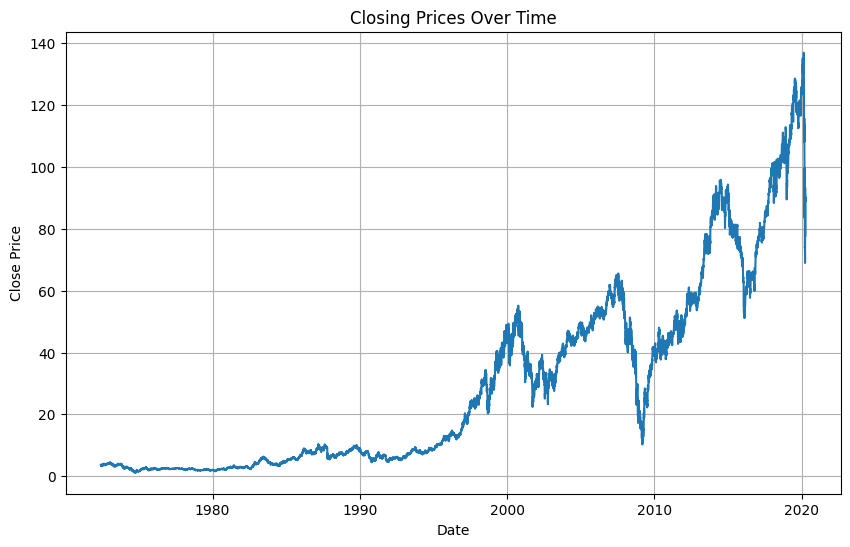

In [222]:
#Convert "Date" column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

#Visualize
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [224]:
df.head()

,Date,Close
0,1972-06-01,3.693287
1,1972-06-02,3.677195
2,1972-06-05,3.604777
3,1972-06-06,3.411664
4,1972-06-07,3.371432


In [225]:
#Reshaping the 1D array to a 2D array with a single column
close_price= df["Close"].values.reshape(-1,1)

scaler = MinMaxScaler()
trainData = scaler.fit_transform(close_price)

df.head()

,Date,Close
0,1972-06-01,3.693287
1,1972-06-02,3.677195
2,1972-06-05,3.604777
3,1972-06-06,3.411664
4,1972-06-07,3.371432


In [226]:
# Convert data in the form of a 3D array for our LSTM model.
# 60 timestep;12064 length of the data

x_train = []
y_train = []
for i in range(60, 12064):
    x_train.append(trainData[i-60:i, 0])
    y_train.append(trainData[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # adding the batch_size axis

x_train.shape

(12004, 60, 1)

In [227]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [233]:
model = Sequential()

model.add(LSTM(units=100,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

hist = model.fit(x_train,y_train,epochs=100,batch_size=32, verbose = 2)

Epoch 1/100
376/376 - 85s - loss: 0.0027 - 85s/epoch - 227ms/step
Epoch 2/100
376/376 - 74s - loss: 0.0011 - 74s/epoch - 196ms/step
Epoch 3/100
376/376 - 74s - loss: 9.4858e-04 - 74s/epoch - 196ms/step
Epoch 4/100
376/376 - 74s - loss: 7.9377e-04 - 74s/epoch - 196ms/step
Epoch 5/100
376/376 - 75s - loss: 6.7452e-04 - 75s/epoch - 201ms/step
Epoch 6/100
376/376 - 74s - loss: 7.1554e-04 - 74s/epoch - 196ms/step
Epoch 7/100
376/376 - 74s - loss: 6.2030e-04 - 74s/epoch - 197ms/step
Epoch 8/100
376/376 - 76s - loss: 6.1329e-04 - 76s/epoch - 202ms/step
Epoch 9/100
376/376 - 74s - loss: 5.7816e-04 - 74s/epoch - 196ms/step
Epoch 10/100
376/376 - 73s - loss: 6.1447e-04 - 73s/epoch - 195ms/step
Epoch 11/100
376/376 - 76s - loss: 6.1780e-04 - 76s/epoch - 201ms/step
Epoch 12/100
376/376 - 74s - loss: 5.4567e-04 - 74s/epoch - 196ms/step
Epoch 13/100
376/376 - 74s - loss: 5.4161e-04 - 74s/epoch - 197ms/step
Epoch 14/100
376/376 - 76s - loss: 5.7144e-04 - 76s/epoch - 203ms/step
Epoch 15/100
376/376 - 

In [232]:
plt.plot(hist.history["loss"])
plt.title('Training model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(["train], loc="upper left")
plt.show()

NameError: ignored

In [ ]:
x_train.shape #80%

In [ ]:
x_test.shape #20%

In [ ]:
x_train[:10]

In [ ]:
y_train[:10]